In [7]:
import plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plotly.tools.set_credentials_file(username='cclipp', api_key='PXEF8jIWI8E52Cst97E4')

In [8]:
try:
    df = pd.read_csv(r'D:\uci_data\donorschoose-application-screening\train\train.csv')
except:
    df = pd.read_csv(r'H:\uci_data\donorschoose-application-screening\train\train.csv')
    

In [9]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 16 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                        

In [10]:
df["project_subject_categories"].value_counts()

Literacy & Language                           39257
Math & Science                                28555
Literacy & Language, Math & Science           24499
Health & Sports                               16951
Music & The Arts                               8527
Special Needs                                  7065
Literacy & Language, Special Needs             6685
Applied Learning                               6310
Math & Science, Literacy & Language            3843
Applied Learning, Literacy & Language          3725
History & Civics                               3065
Math & Science, Special Needs                  3010
Literacy & Language, Music & The Arts          2878
Math & Science, Music & The Arts               2761
Applied Learning, Special Needs                2481
Health & Sports, Special Needs                 2368
History & Civics, Literacy & Language          2288
Warmth, Care & Hunger                          2191
Math & Science, Applied Learning               2071
Applied Lear

In [11]:
dummies = pd.get_dummies(df[["project_grade_category", 'project_subject_categories']], prefix='dum')

In [12]:
pd.concat([dummies, df], axis=1).corr().to_csv('correlations.csv')

In [13]:
df['project_title_wc'] = df['project_title'].apply(lambda x: len(str(x).split(' ')))
df['project_essay_1_wc'] = df['project_essay_1'].apply(lambda x: len(str(x).split(' ')))
df['project_essay_2_wc'] = df['project_essay_2'].apply(lambda x: len(str(x).split(' ')))
df['project_essay_3_wc'] = df['project_essay_3'].apply(lambda x: len(str(x).split(' ')))
df['project_essay_4_wc'] = df['project_essay_4'].apply(lambda x: len(str(x).split(' ')))
df['total_essay_wc'] = df['project_essay_1_wc'] + df['project_essay_2_wc'] + df['project_essay_3_wc'] + df['project_essay_4_wc']
subdf = df[['project_submitted_datetime','school_state', 'project_grade_category', 'project_is_approved','teacher_number_of_previously_posted_projects',
            'project_title', 'project_title_wc', 'total_essay_wc']]
subdf.columns = ['project_submitted_datetime','state', 'category',
                 'approve', 'projects', 'project_title', 'project_title_wc', 'total_essay_wc']


In [14]:
df[df['project_is_approved'] ==1].describe()

,teacher_number_of_previously_posted_projects,project_is_approved,project_title_wc,project_essay_1_wc,project_essay_2_wc,project_essay_3_wc,project_essay_4_wc,total_essay_wc
count,154346.000000,154346.0,154346.000000,154346.000000,154346.000000,154346.000000,154346.000000,154346.000000
mean,12.015867,1.0,5.185842,113.467184,143.225837,4.511507,3.176448,264.380975
std,29.423888,0.0,2.149294,35.830750,51.855455,19.643241,11.755299,68.871846
min,0.000000,1.0,1.000000,7.000000,36.000000,1.000000,1.000000,123.000000
25%,0.000000,1.0,4.000000,88.000000,108.000000,1.000000,1.000000,211.000000
50%,2.000000,1.0,5.000000,103.000000,125.000000,1.000000,1.000000,246.000000
75%,9.000000,1.0,7.000000,134.000000,164.000000,1.000000,1.000000,302.000000
max,451.000000,1.0,58.000000,484.000000,4660.000000,294.000000,190.000000,4744.000000


In [15]:
subdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 8 columns):
project_submitted_datetime    182080 non-null object
state                         182080 non-null object
category                      182080 non-null object
approve                       182080 non-null int64
projects                      182080 non-null int64
project_title                 182080 non-null object
project_title_wc              182080 non-null int64
total_essay_wc                182080 non-null int64
dtypes: int64(4), object(4)
memory usage: 11.1+ MB


In [16]:
subdf.describe()
subdf.to_csv('../static/data/train_data.csv')

In [17]:
census_data = pd.read_csv(r'C:\Users\corey\Dropbox\uci\Homework\16-D3\data\census_data.csv', index_col='locationAbbr')

census_data = census_data[['medianIncomeAll','estimateTotalHouseholds','Uninsured Population; Estimate; In labor force']]
census_data.columns = ['medianIncome', 'totalHouseholds', 'uninsured']

In [18]:
costs_state = pd.read_csv(r'H:\uci_data\donorschoose-application-screening\mean_by_state.csv', index_col='school_state')

costs_state.head()

costs_state

FileNotFoundError: File b'H:\\uci_data\\donorschoose-application-screening\\mean_by_state.csv' does not exist

In [ ]:
subdf = pd.concat([subdf.groupby('state').mean(), census_data, costs_state['total_price']], axis=1).drop('GU')
subdf.info()

In [ ]:
subdf.reset_index().to_csv('../static/data/census_data.csv', index=False)

In [19]:
subdf[subdf['approve' == 1]].describe()

KeyError: False

In [27]:
temp_data

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,project_title_wc,project_essay_1_wc,project_essay_2_wc,project_essay_3_wc,project_essay_4_wc,total_essay_wc
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,NaN,students need 6 ipod nanos create differentiat...,26,1,4,170,142,1,1,314
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,NaN,students need matching shirts wear dance perfo...,1,0,5,94,102,1,1,198
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,NaN,students need 3doodler sem school means studen...,5,1,4,135,101,1,1,238
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,NaN,students need balls activity equipment meet ne...,16,0,10,206,202,1,1,410
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,NaN,students need water filtration system culinary...,42,1,9,84,108,1,1,194
5,p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,2016-11-05 10:01:51,Grades PreK-2,"Applied Learning, Literacy & Language","Character Education, Literature & Writing",Need to Reach Our Virtual Mentors!!!,My kids tell me each day that they want to mak...,...,NaN,students need tablets order communicate virtua...,0,1,7,86,118,1,1,206
6,p103285,4e156c5fb3eea2531601c8736f3751a7,Mrs.,MO,2016-08-31 00:30:43,Grades PreK-2,Health & Sports,Health & Wellness,Active Kindergartners,Kindergarten is the new first grade. My studen...,...,NaN,students need stability stools inflatable disc...,1,1,2,133,152,1,1,287
7,p181781,c71f2ef13b4bc91afac61ca8fd4c0f9f,Mrs.,SC,2016-08-03 13:26:01,Grades PreK-2,"Applied Learning, Literacy & Language","Early Development, Literature & Writing",Fabulous Firsties-Wiggling to Learn!,First graders are fantastic! They are excited ...,...,NaN,students need wiggle stools allow active learners,0,1,4,82,101,1,1,185
8,p114989,b580c11b1497a0a67317763b7f03eb27,Ms.,IN,2016-09-13 22:35:57,Grades 6-8,Math & Science,Mathematics,Wobble Chairs Help Fidgety Kids Focus,My seventh graders dream big. They can't wait ...,...,NaN,students need seating allows fidgety move arou...,13,1,6,102,136,1,1,240
9,p191410,2071fb0af994f8f16e7c6ed0f35062a1,Mrs.,IL,2016-09-24 18:38:59,Grades PreK-2,Literacy & Language,Literacy,Snuggle Up With A Good Book,I teach first grade in a small farming town in...,...,NaN,students need 2 youth sized reclining chairs r...,12,1,6,109,134,1,1,245


## Word Cloud

(-0.5, 1199.5, 799.5, -0.5)

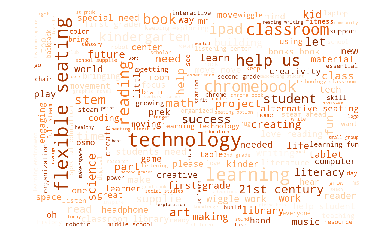

In [40]:
import re
from nltk.corpus import stopwords
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text  
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text    
    temp = [s.strip() for s in text.split() if s not in STOPWORDS]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

temp_data = df.dropna(subset=['project_title'])
# converting into lowercase
temp_data['project_title'] = temp_data['project_title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
temp_data['project_title'] = temp_data['project_title'].map(text_prepare)



from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

donorsChoose = np.array(Image.open("logo.png"))
stopwords = set(STOPWORDS)
stopwords.add("need")


image_colors = ImageColorGenerator(donorsChoose)

wc = WordCloud(max_font_size=70, width=1200, height=800,colormap='Oranges',
                      background_color="white").generate(' '.join(temp_data['project_title'].values))
# show
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc)
plt.axis("off")
#plt.savefig('resource_wordcloud.jpg', bbox_inches='tight')
#plt.figure()
#plt.show()

In [32]:
WordCloud?